In [1]:
from classy import Class

This notebooks calculates and plots residual power spectra of Cl TT, /Phi/Phi, and P(k) of LCDM vs IDM (at m = 1e-3 GeV and Sigma0 = 1.e-28 cm^2)

In [2]:
model = Class()
model.struct_cleanup()

In [3]:
model.set({'omega_cdm':0.1205, "omega_b":0.02218, "h":0.67, "tau_reio":0.07})
# since there is not dmeff, you cannot put in other dmeff parameters
# model.set({"m_dmeff":1e-3,"sigma_dmeff":1e-36, "npow_dmeff":-4})
# model.set({"dmeff_Vrms_dynamic":"yes","dmeff_niter_dynamic_max":15, "Vrms_convergence_tol":1e-2})
model.set({"tau_reio":0.07,"ln10^{10}A_s":3.056,"n_s":0.9619})
# Vrel_dmeff_data is set to 0, but in standard LCDM model Vrel... = 30 
model.compute()

In [4]:
model.set({"tight_coupling_trigger_tau_c_over_tau_h":0.0, "tight_coupling_trigger_tau_c_over_tau_k":0.0})
model.compute()

In [5]:
model.set({"output":"tCl, lCl, pCl, mPk", "root":"test_output/lcdm_","recombination":"recfast", "gauge":"synchronous"})
model.set({"root": "test_output/lcdm_","write thermodynamics":"yes", "write background":"yes", "lensing":"yes"})
model.set({"k_per_decade_for_pk":100, "P_k_max_h/Mpc":5})
model.compute()

In [9]:
from classy import Class
dmeff = Class()
dmeff.struct_cleanup()

In [10]:
dmeff.set({'omega_dmeff':0.1205, "omega_cdm": 1e-15,"omega_b":0.02218, "h":0.67, "tau_reio":0.07})
dmeff.set({"m_dmeff":1e-3,"sigma_dmeff":1.0e-28, "npow_dmeff":-4})
dmeff.set({"dmeff_Vrms_dynamic":"yes","dmeff_niter_dynamic_max":10, "Vrms_convergence_tol":1e-3})
dmeff.set({"tau_reio":0.07,"ln10^{10}A_s":3.056,"n_s":0.9619})
dmeff.compute()

In [11]:
# Vrel_dmeff_rate is set to 0, but in standard LCDM model Vrel... = 30 
dmeff.set({"Vrel_dmeff_rate":30})
dmeff.set({"tight_coupling_trigger_tau_c_over_tau_h":0.0, "tight_coupling_trigger_tau_c_over_tau_k":0.0})


True

In [12]:
dmeff.set({"output":"tCl, lCl, pCl, mPk", "root":"test_output/dmeff_","recombination":"recfast", "gauge":"synchronous"})
dmeff.set({"write thermodynamics":"yes", "write background":"yes", "lensing":"yes"})
dmeff.set({"k_per_decade_for_pk":100, "P_k_max_h/Mpc":5})
dmeff.set({"sigma_dmeff_security":"yes"})
dmeff.compute()

In [18]:
# plot these values
# get all C_l output
cls = model.raw_cl(3000)
ll = cls['ell'][2:]
clTT = cls['tt'][2:]
clEE = cls['ee'][2:]
clPP = cls['pp'][2:]

In [19]:
cls1 = dmeff.raw_cl(3000)
ll1= cls1['ell'][2:]
clTT1 = cls1['tt'][2:]
clEE1 = cls1['ee'][2:]
clPP1 = cls1['pp'][2:]

In [20]:
# to get plots displayed in notebook
%matplotlib notebook
import matplotlib.pyplot as plt
from math import pi

<IPython.core.display.Javascript object>


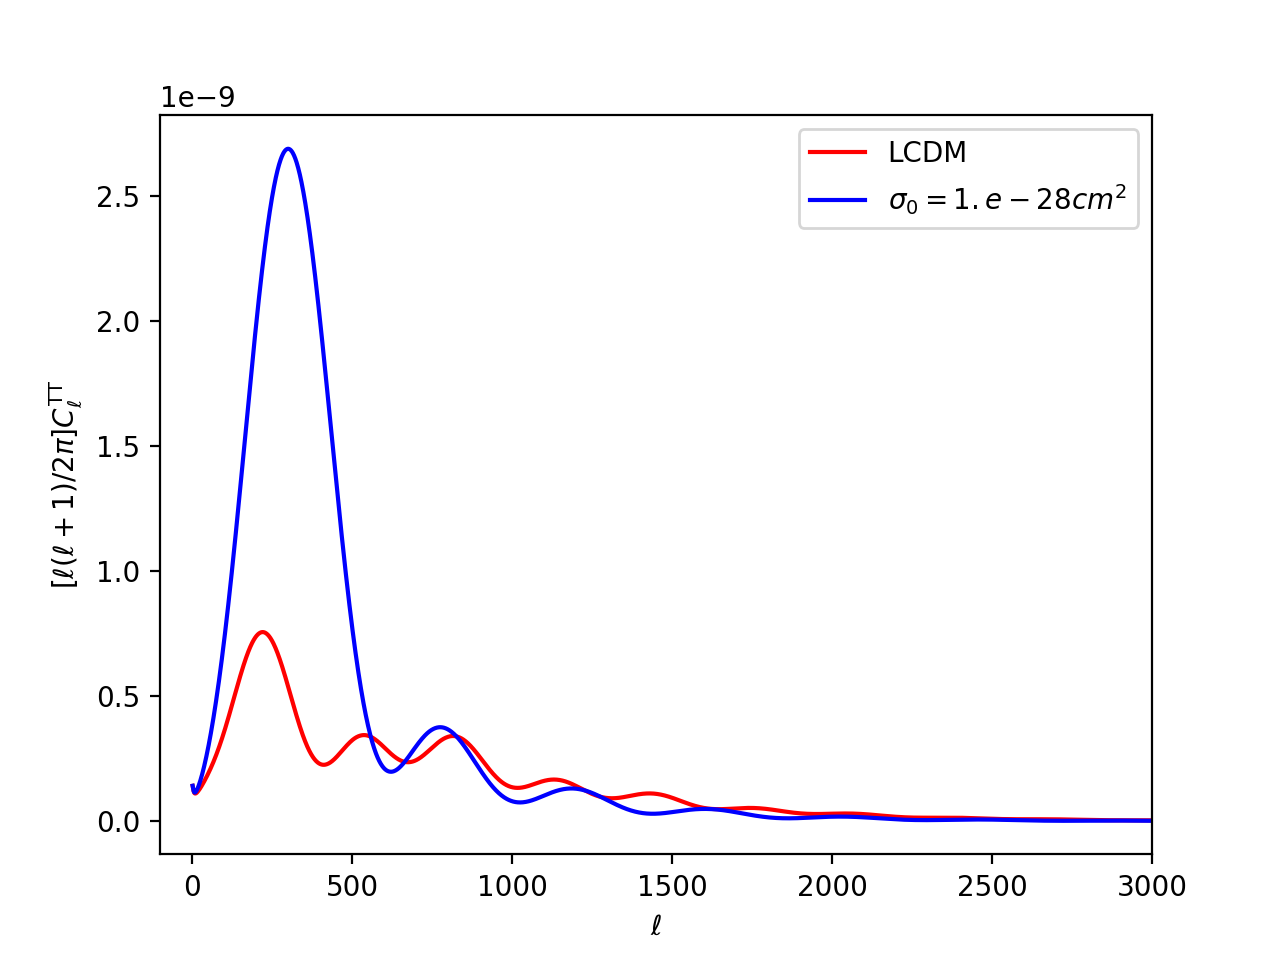

In [27]:
# plot C_l^TT
plt.figure(1)
plt.xscale('linear');plt.yscale('linear');plt.xlim(-100,3000)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
plt.plot(ll,clTT*ll*(ll+1)/2./pi,'r-',label = "LCDM")
plt.plot(ll1,clTT1*ll1*(ll1+1)/2./pi,'b-', label = r'$\sigma_0 = 1.e-28 cm^2$')
plt.legend(loc ="upper right")
plt.show()

<IPython.core.display.Javascript object>


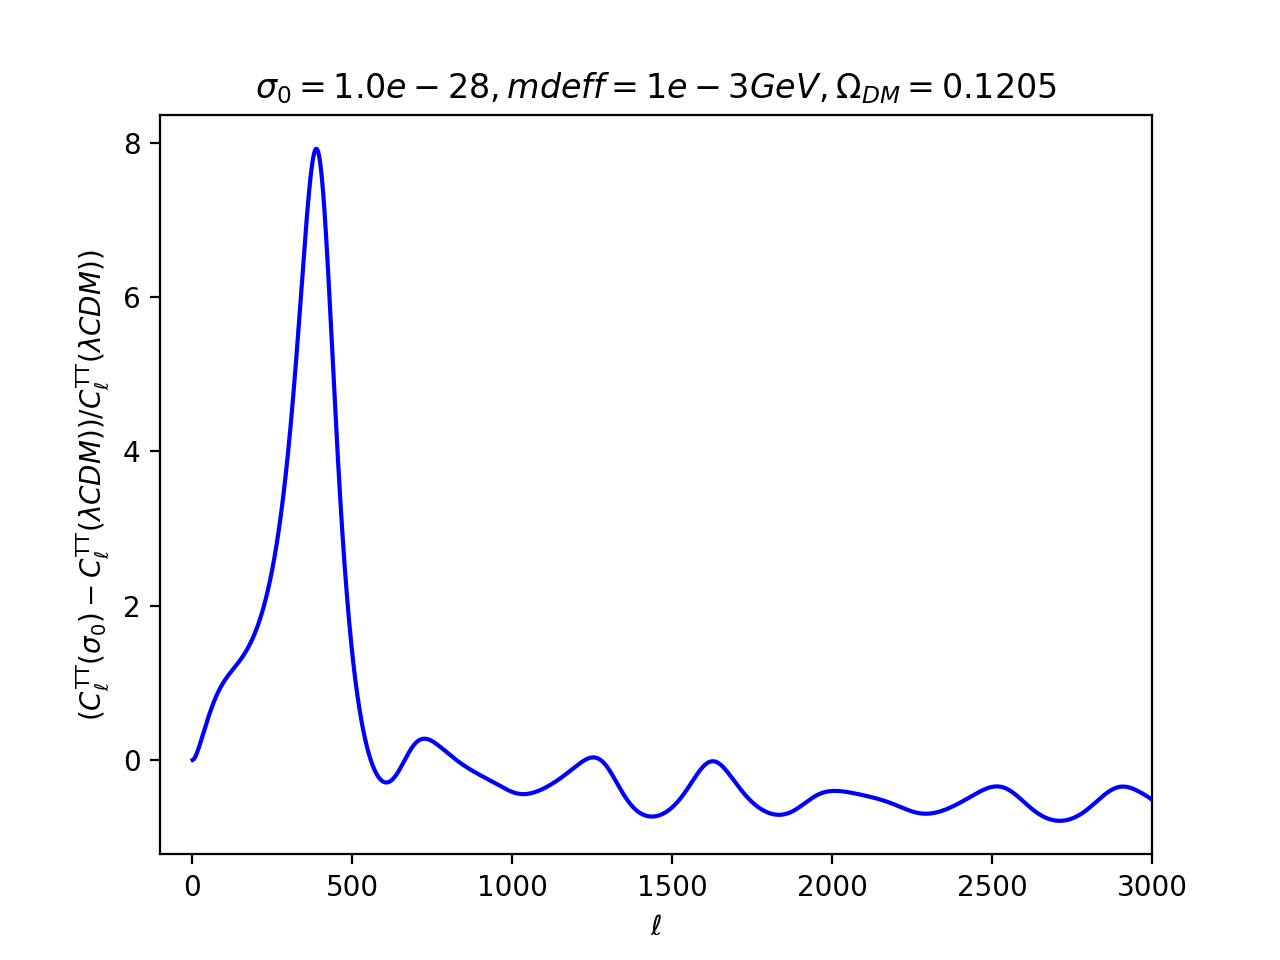

In [33]:
# plot C_l^TT
plt.figure(2)
plt.xscale('linear');plt.yscale('linear');plt.xlim(-100,3000)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$ (C_\ell^\mathrm{TT}(\sigma_0) - C_\ell^\mathrm{TT}(\lambda CDM))/C_\ell^\mathrm{TT}(\lambda CDM))$')
#plt.plot(ll,clTT*ll*(ll+1)/2./pi,'r-',label = "")
plt.plot(ll1,(clTT1-clTT)/clTT,'b-')
plt.title(r'$\sigma_0 = 1.0e-28, m deff = 1e-3 GeV, \Omega_{DM} = 0.1205$')
plt.show()

<IPython.core.display.Javascript object>


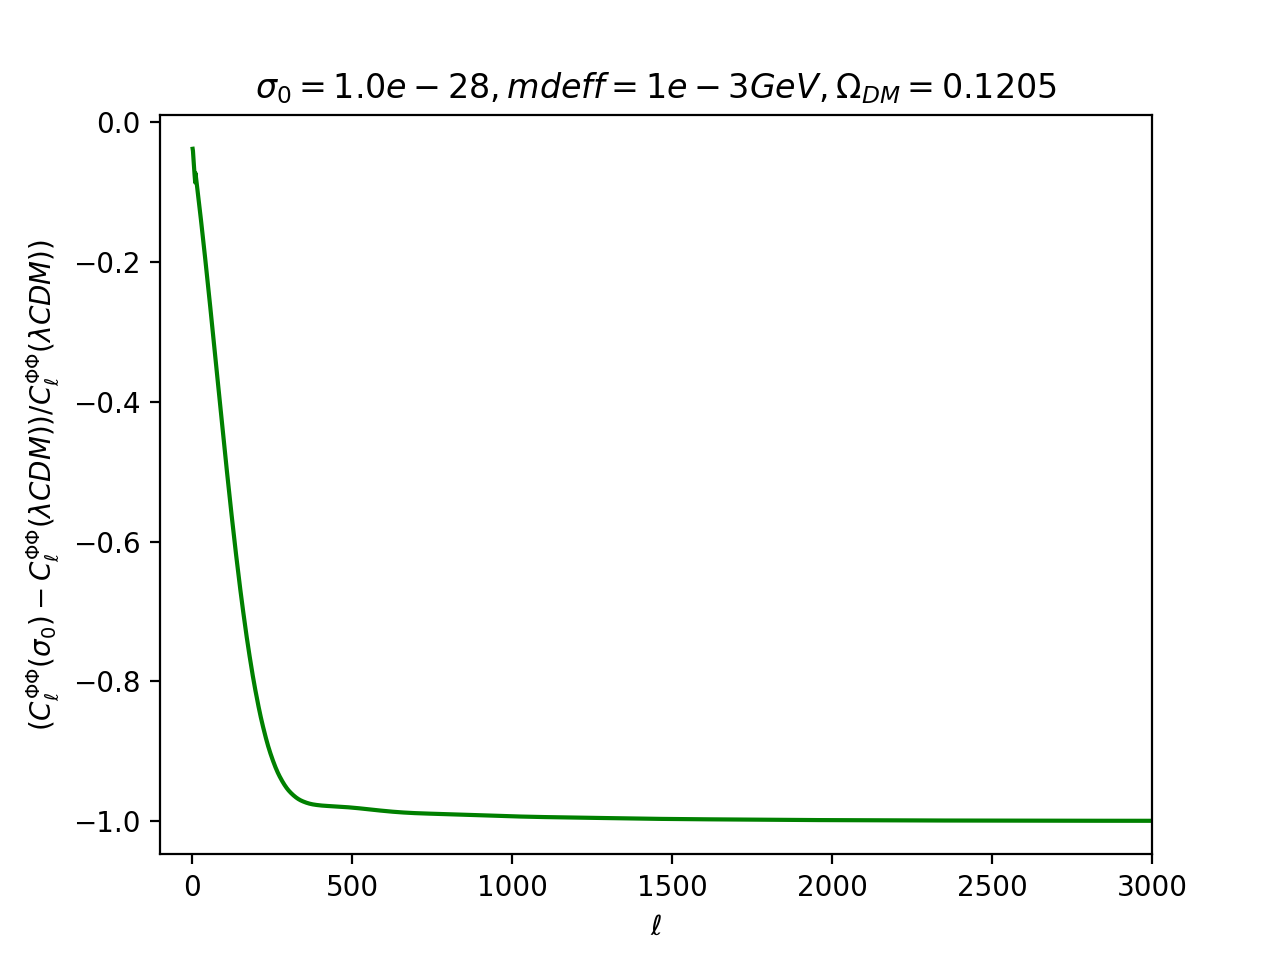

In [55]:
# plot C_l^PP (I could not find /kappa/kappa)
plt.figure(3)
plt.xscale('linear');plt.yscale('linear');plt.xlim(-100,3000)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$ (C_\ell^\mathrm{\Phi\Phi}(\sigma_0) - C_\ell^\mathrm{\Phi\Phi}(\lambda CDM))/C_\ell^\mathrm{\Phi\Phi}(\lambda CDM))$')
#plt.plot(ll,clTT*ll*(ll+1)/2./pi,'r-',label = "")
plt.plot(ll1,(clPP1-clPP)/clPP,'g-')
plt.title(r'$\sigma_0 = 1.0e-28, m deff = 1e-3 GeV, \Omega_{DM} = 0.1205$')
plt.show()

In [48]:
# get P(k) at redhsift z=0
import numpy as np
kk = np.logspace(-4,np.log10(3),1000)
Pk = []
for k in kk:
    Pk.append(model.pk(k,0.)) # function .pk(k,z)
Pk_dmeff = []
for k in kk:
    Pk_dmeff.append(dmeff.pk(k,0.)) #
Pk = np.array(Pk)
Pk_dmeff = np.array(Pk_dmeff)

<IPython.core.display.Javascript object>


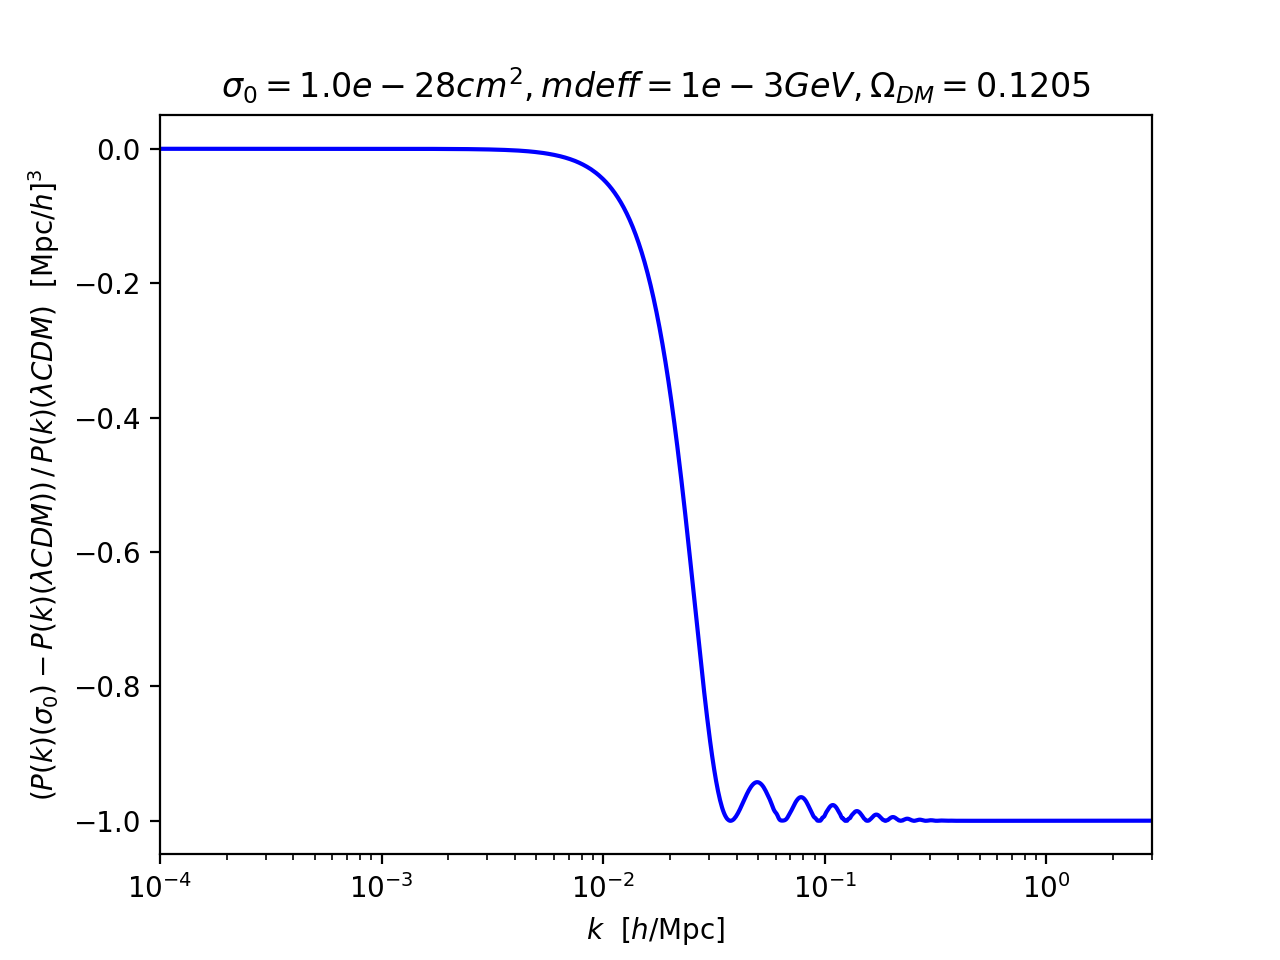

In [54]:
# plot P(k)
plt.figure(4)
plt.xscale('log');plt.yscale('linear');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$(P(k)(\sigma_0) - P(k)(\lambda CDM))\,/\, P(k)(\lambda CDM)  \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.plot(kk,(Pk_dmeff - Pk)/Pk,'b-')
plt.title(r'$\sigma_0 = 1.0e-28 cm^2, m deff = 1e-3 GeV, \Omega_{DM} = 0.1205$')
plt.show()

Now we can also compare how different these residual spectra are for different cross-sections.

In [50]:
# create new IDM model
idm = Class()
idm.struct_cleanup()

In [51]:
idm.set({'omega_dmeff':0.1205, "omega_cdm": 1e-15,"omega_b":0.02218, "h":0.67, "tau_reio":0.07})
idm.set({"m_dmeff":1e-3,"sigma_dmeff":1.0e-36, "npow_dmeff":-4})
idm.set({"dmeff_Vrms_dynamic":"yes","dmeff_niter_dynamic_max":10, "Vrms_convergence_tol":1e-3})
idm.set({"tau_reio":0.07,"ln10^{10}A_s":3.056,"n_s":0.9619})
idm.compute()

In [52]:
idm.set({"Vrel_dmeff_rate":30})
idm.set({"tight_coupling_trigger_tau_c_over_tau_h":0.0, "tight_coupling_trigger_tau_c_over_tau_k":0.0})
idm.set({"output":"tCl, lCl, pCl, mPk", "root":"test_output/dmeff_","recombination":"recfast", "gauge":"synchronous"})
idm.set({"write thermodynamics":"yes", "write background":"yes", "lensing":"yes"})
idm.set({"k_per_decade_for_pk":100, "P_k_max_h/Mpc":5})
idm.set({"sigma_dmeff_security":"yes"})
idm.compute()


In [53]:
cls2 = dmeff.raw_cl(3000)
ll2= cls2['ell'][2:]
clTT2 = cls2['tt'][2:]
clEE2 = cls2['ee'][2:]
clPP2 = cls2['pp'][2:]

Pk2 = []
for k in kk:
    Pk2.append(dmeff.pk(k,0.)) #
Pk2 = np.array(Pk2)

<IPython.core.display.Javascript object>


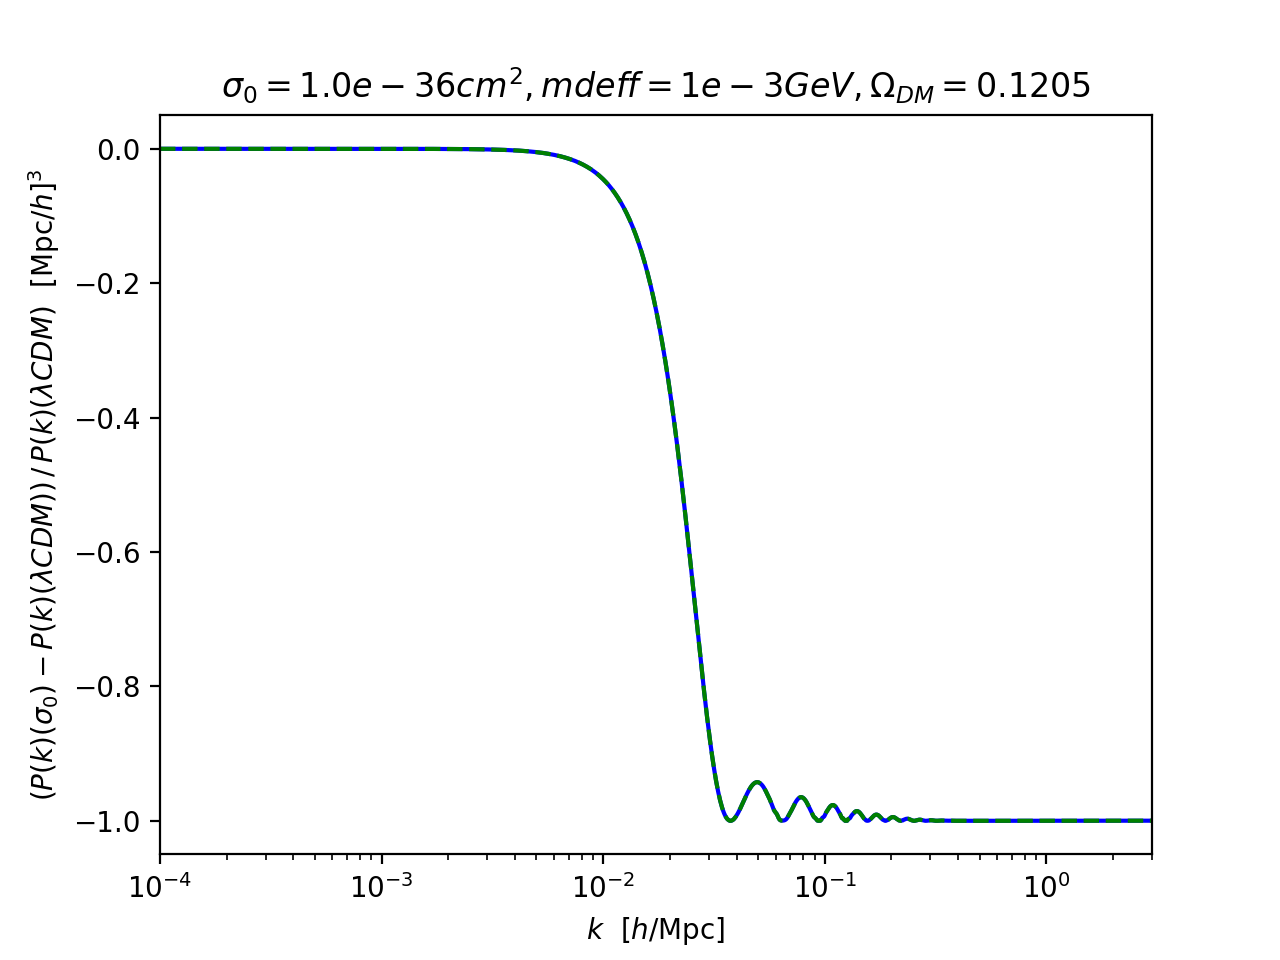

In [56]:
# they are almost identical - even though cross-section is very different!
plt.figure(5)
plt.xscale('log');plt.yscale('linear');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$(P(k)(\sigma_0) - P(k)(\lambda CDM))\,/\, P(k)(\lambda CDM)  \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.plot(kk,(Pk_dmeff - Pk)/Pk,'b-',label = r'$\sigma_0 = 1.0e-28 cm^2$')
plt.plot(kk,(Pk2 - Pk)/Pk,'g--',label = r'$\sigma_0 = 1.0e-36 cm^2$')
plt.title(r'$\sigma_0 = 1.0e-36 cm^2, m deff = 1e-3 GeV, \Omega_{DM} = 0.1205$')
plt.show()